In [1]:
from collections import Counter
import utils
import numpy as np
from constants import *

In [2]:
dataset = np.load('mars_for_students.npz')

In [3]:
dataset.files

['training_set', 'test_set']

In [4]:
training_set = dataset['training_set']

X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = dataset['test_set']

print(f'Training X shape: {X_train.shape}')
print(f'Training y shape: {y_train.shape}')
print(f'Test X shape: {X_test.shape}')

Training X shape: (2615, 64, 128)
Training y shape: (2615, 64, 128)
Test X shape: (10022, 64, 128)


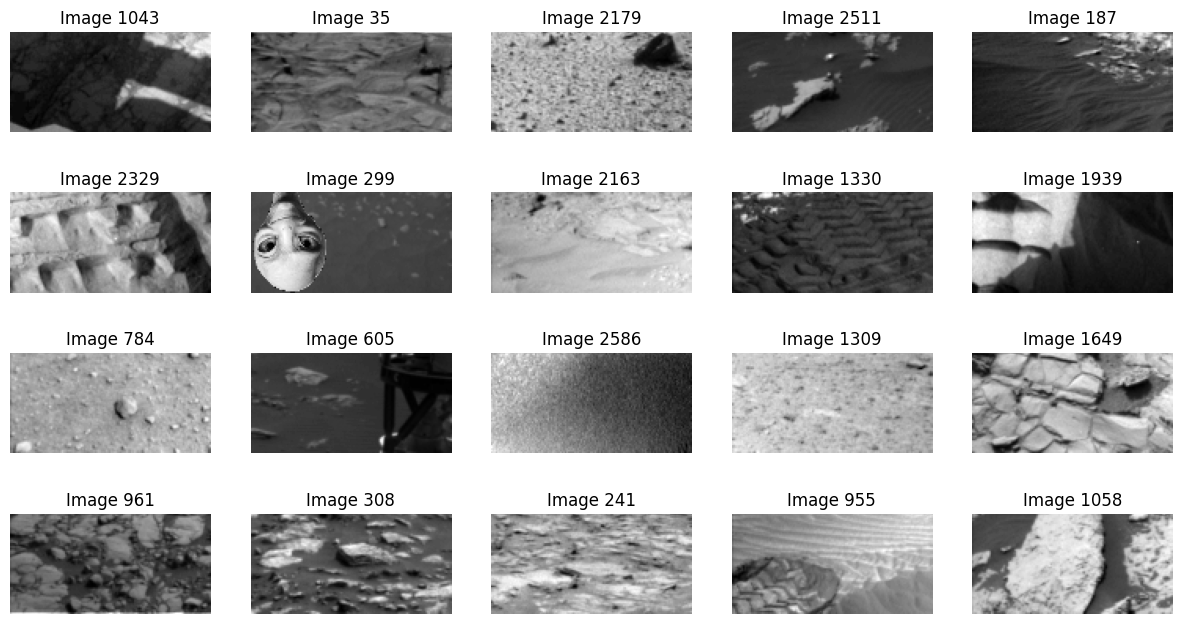

In [262]:
utils.visualize_random_images(X_train, 20)

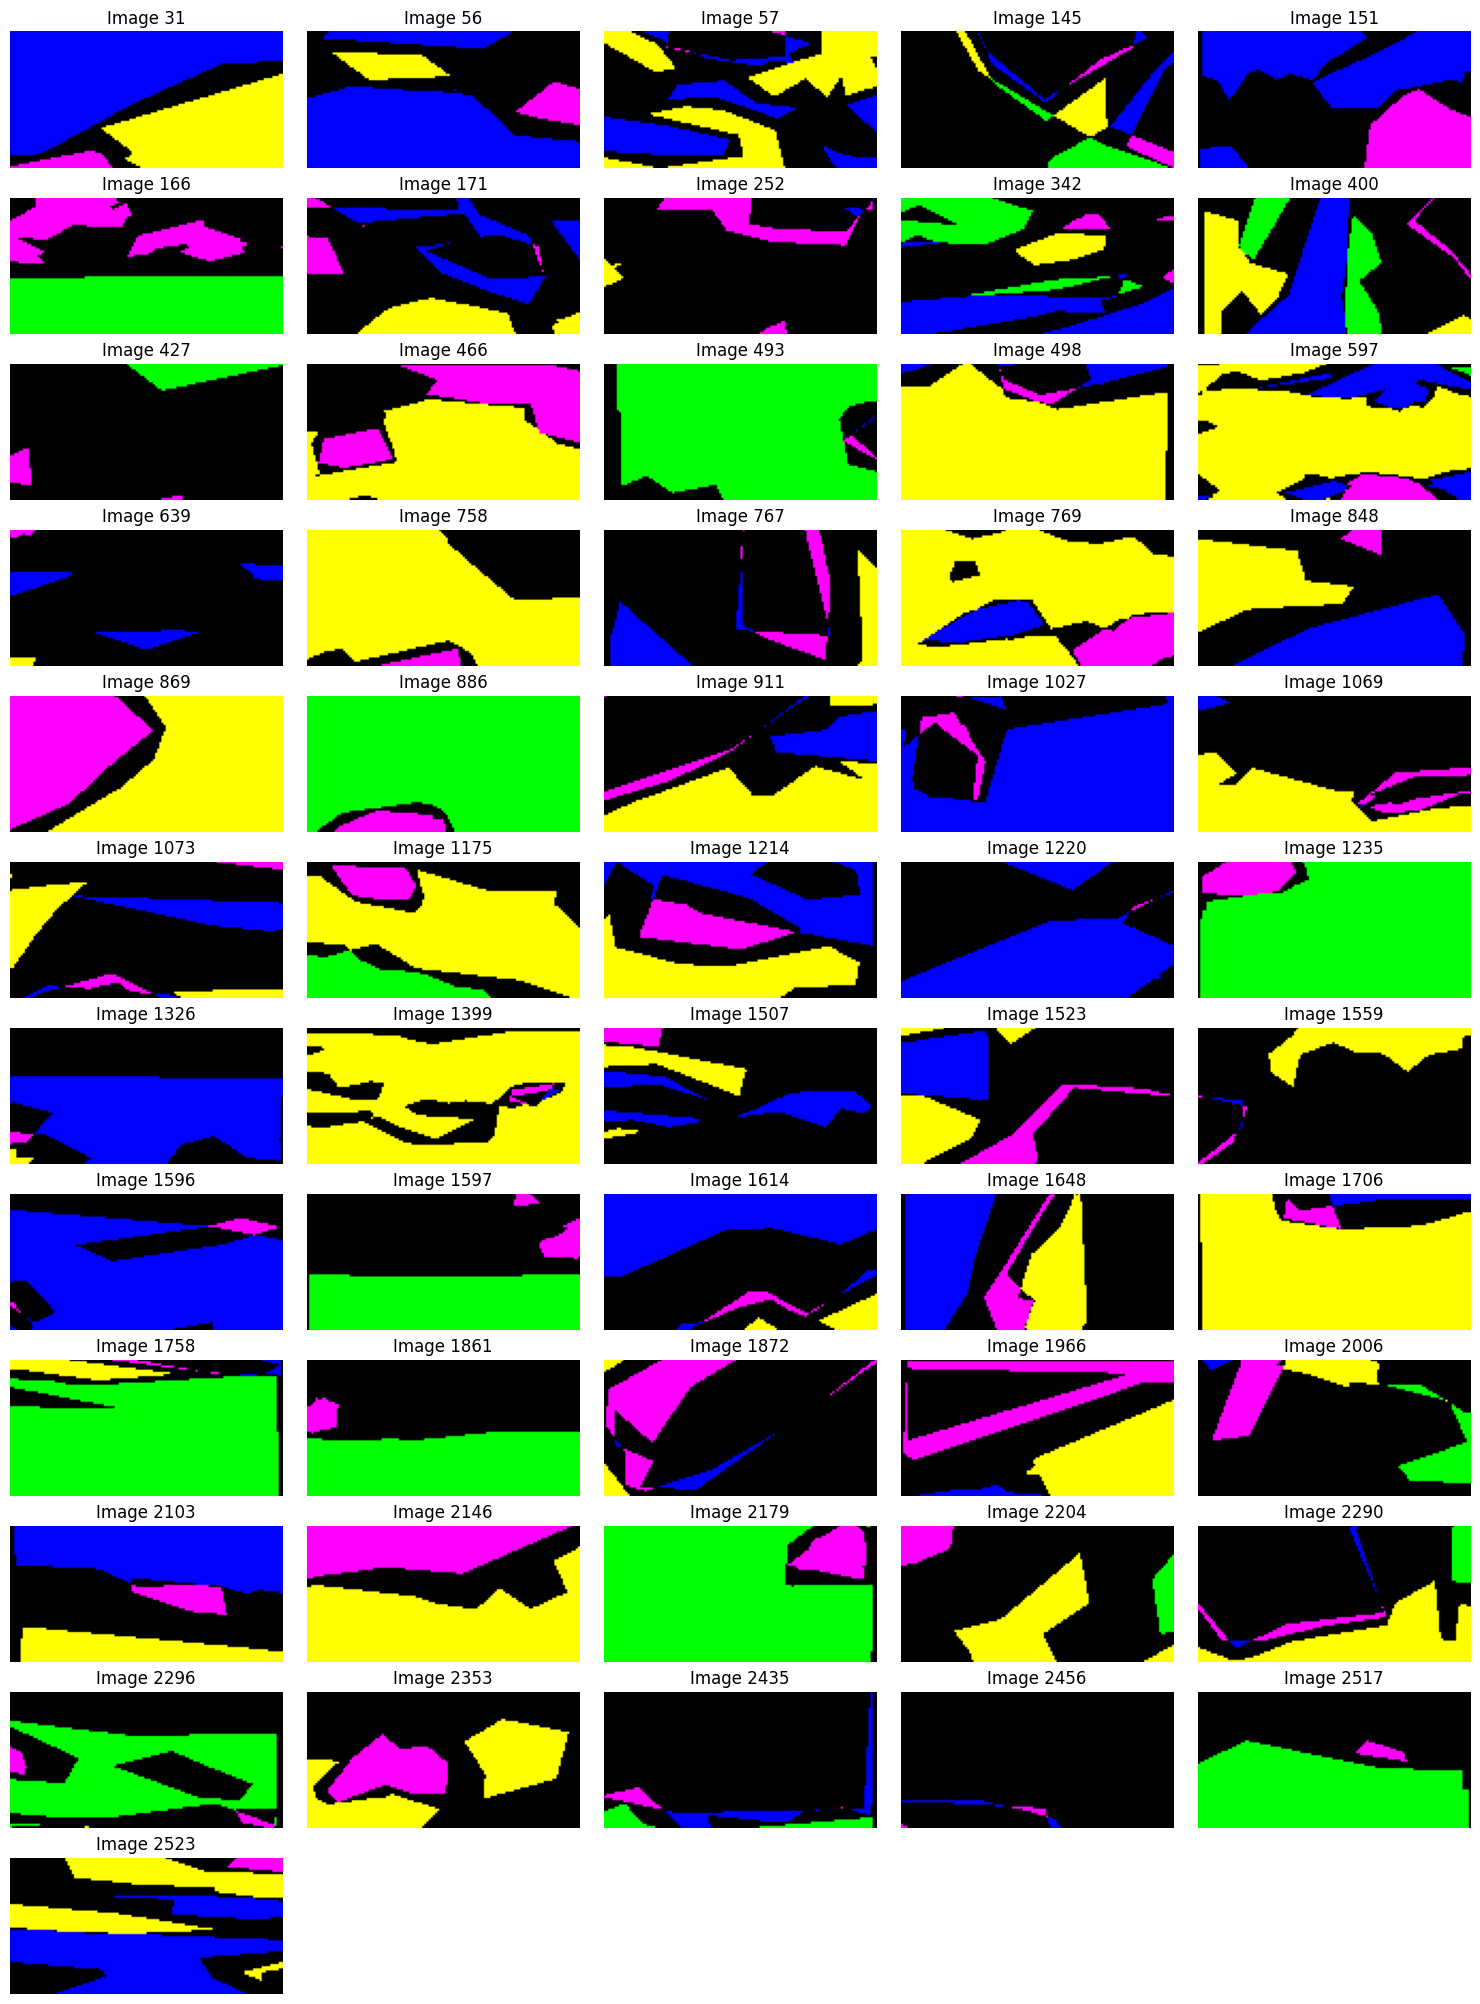

In [5]:
indexes = utils.show_images_from_specified_class(y_train, n = 150, threshold = 0.001)

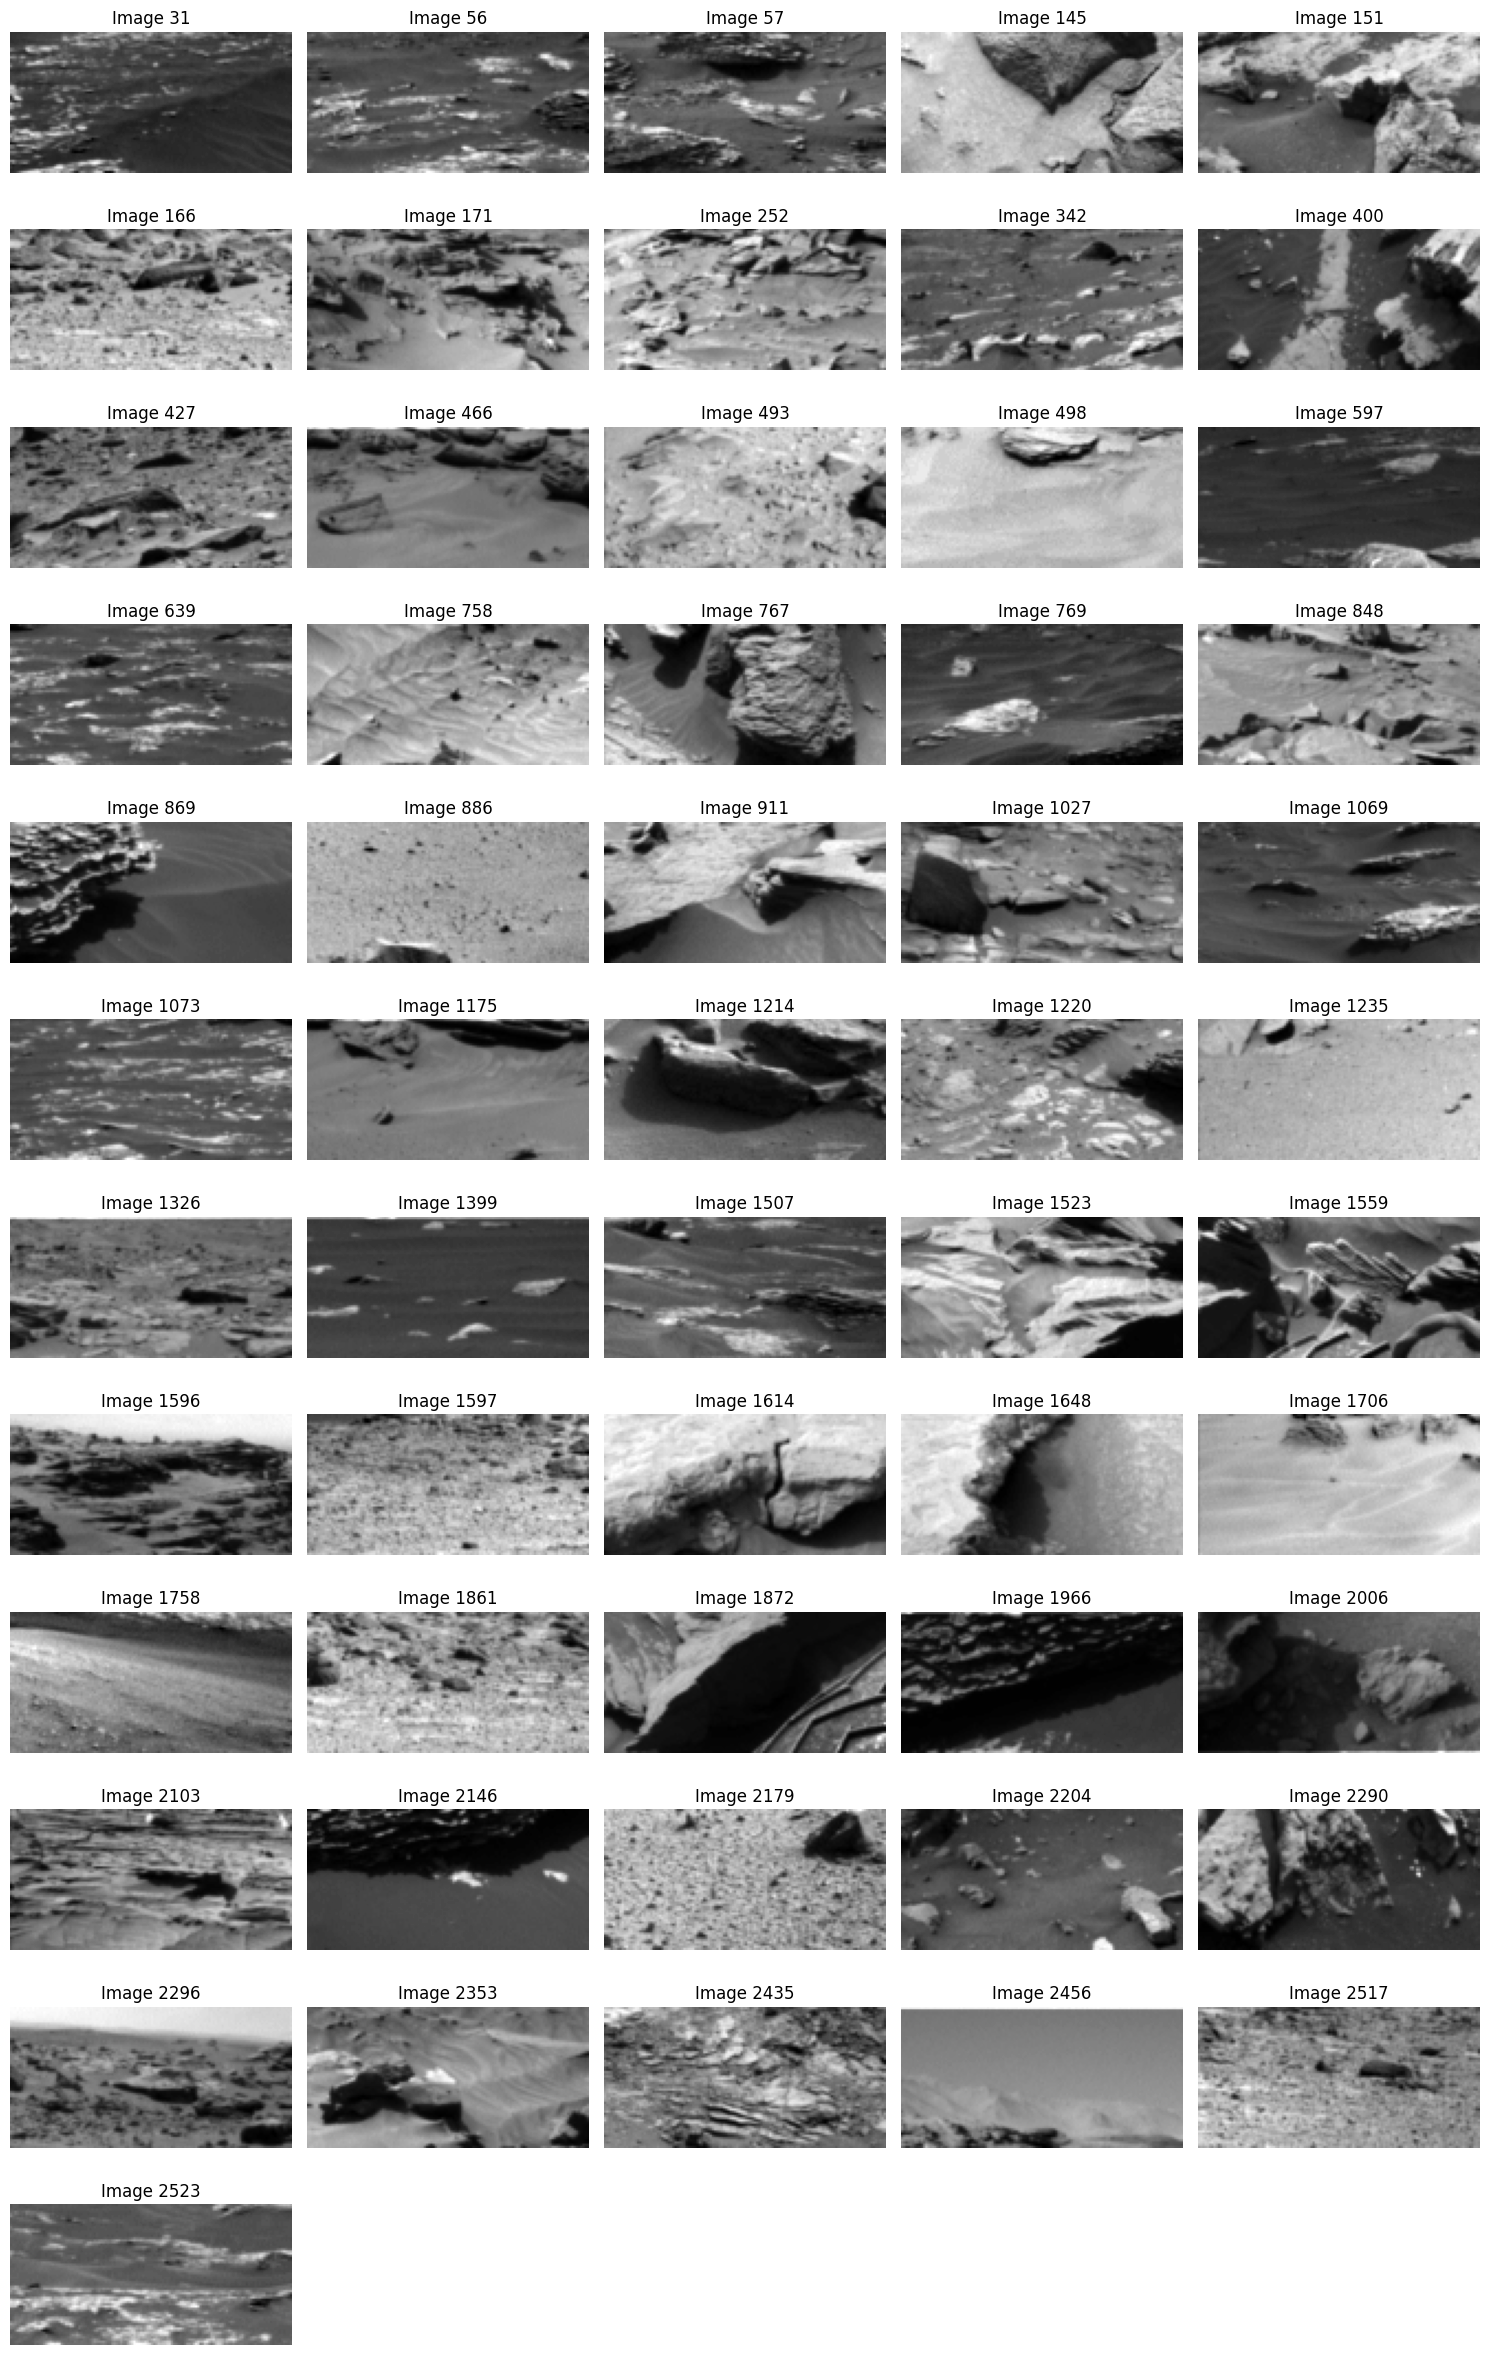

In [6]:
utils.visualize_images(X_train, indexes)

Found 39 unique images with duplicates.


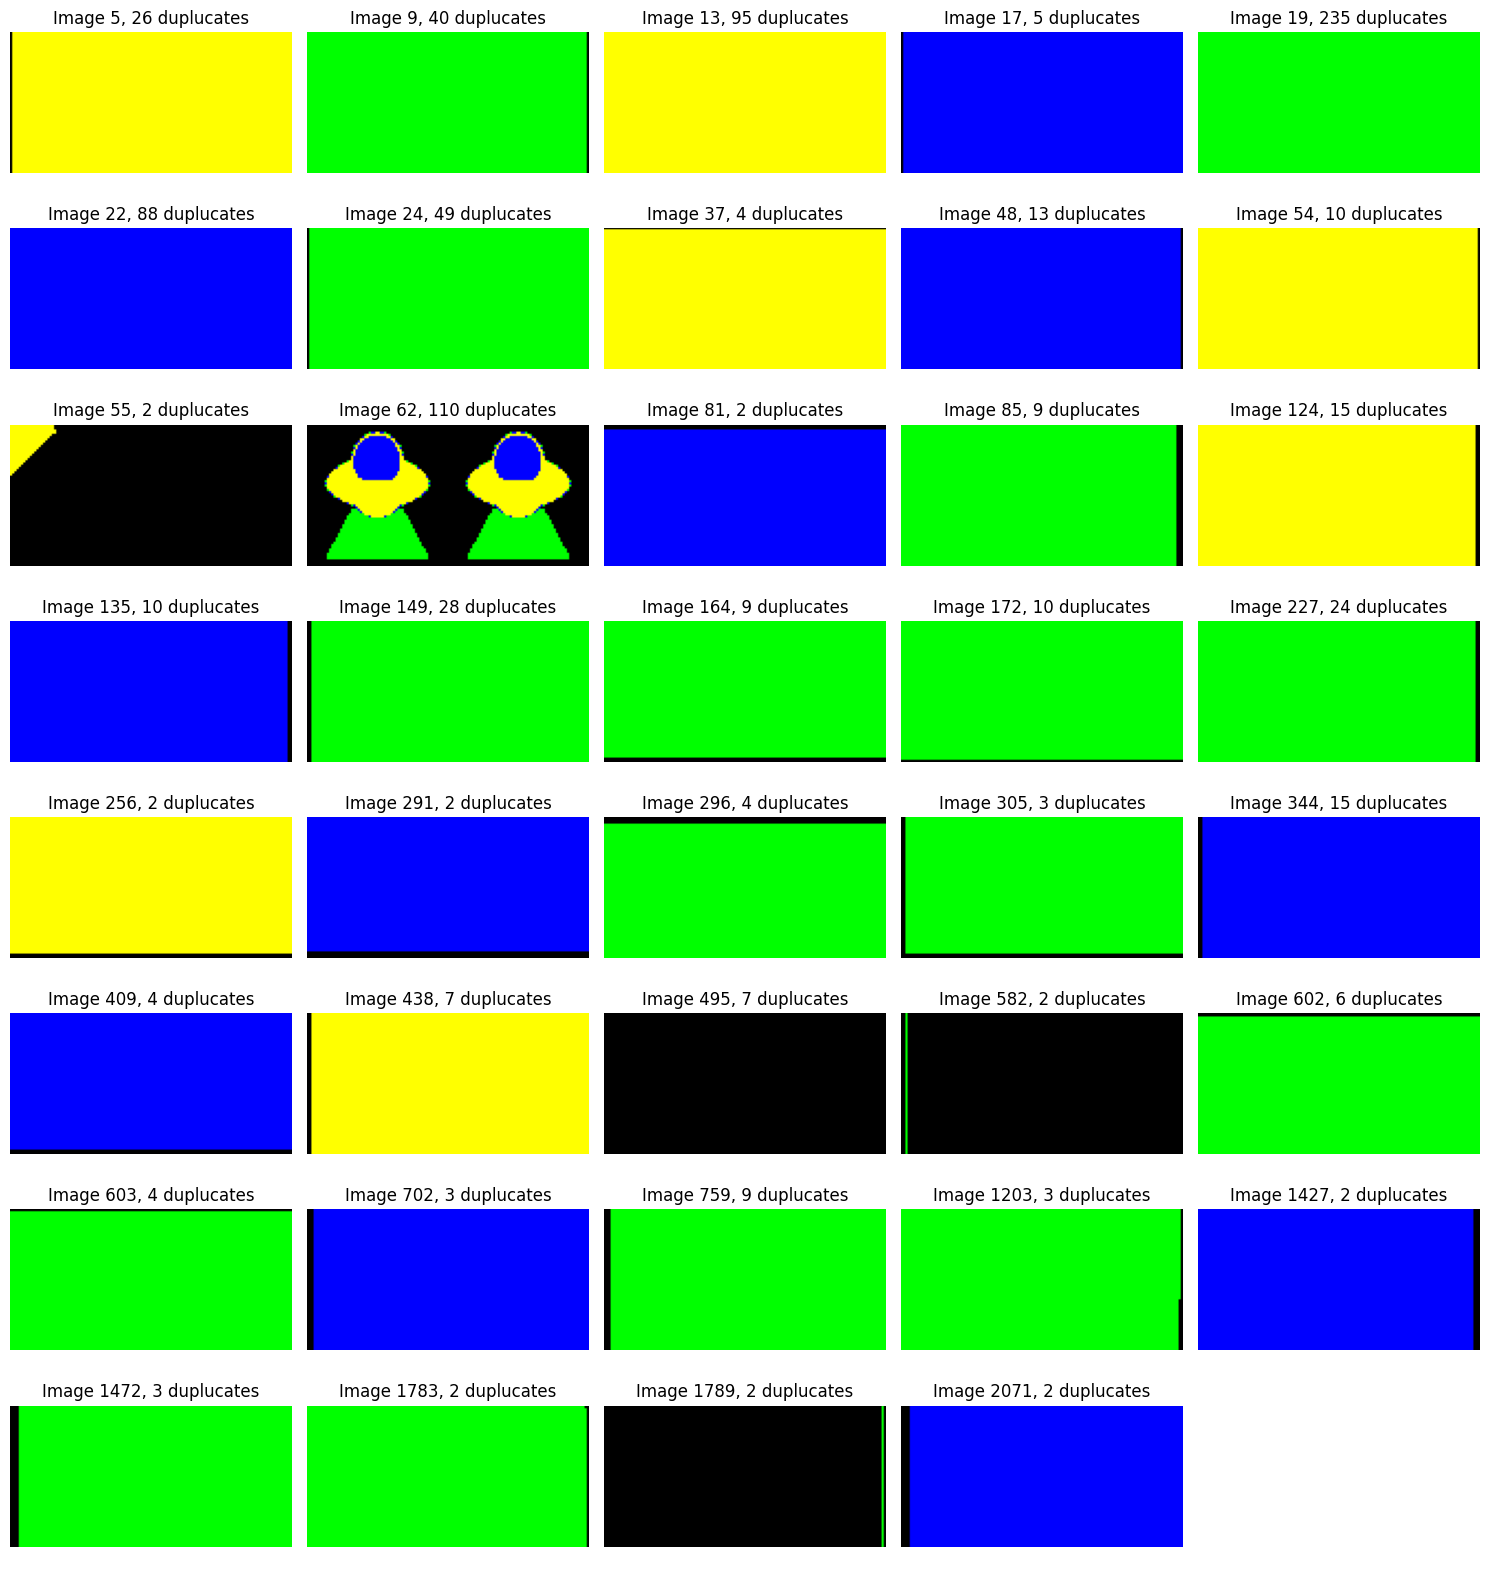

In [7]:
utils.show_duplicates(images = y_train)

In [8]:
def compute_class_distribution(labels):
    class_counts = Counter()
    for label in labels:
        unique, counts = np.unique(label, return_counts=True)
        class_counts.update(dict(zip(unique.astype('uint'), counts)))
    return dict(class_counts)

def compute_class_percentage(class_counts):
    total_pixels = sum(class_counts.values())
    return {cls: (count / total_pixels) * 100 for cls, count in class_counts.items()}

def check_class_presence(labels, num_classes):
    presence = []
    for label in labels:
        unique_classes = np.unique(label)
        presence.append(unique_classes.tolist())
    return presence

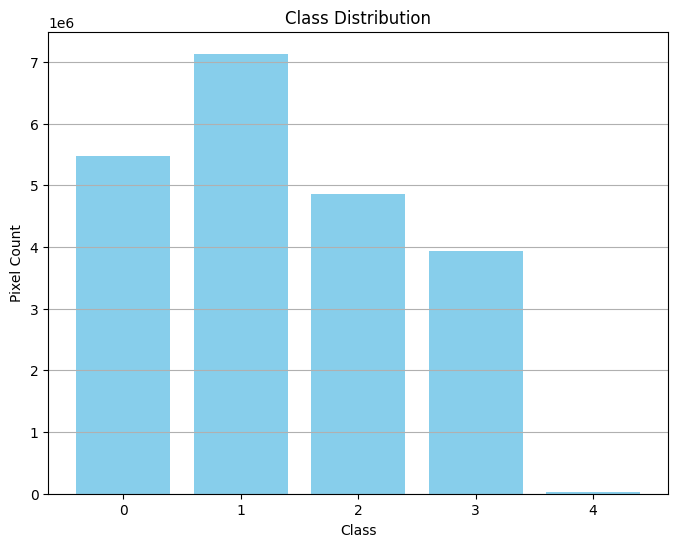

In [9]:
class_counts = compute_class_distribution(y_train)
utils.plot_class_distribution(class_counts)

In [98]:
utils.save_dataset_images(X_train, 'X_train', 'train')

Saving image 0
Saving image 1
Saving image 2
Saving image 3
Saving image 4
Saving image 5
Saving image 6
Saving image 7
Saving image 8
Saving image 9
Saving image 10
Saving image 11
Saving image 12
Saving image 13
Saving image 14
Saving image 15
Saving image 16
Saving image 17
Saving image 18
Saving image 19
Saving image 20
Saving image 21
Saving image 22
Saving image 23
Saving image 24
Saving image 25
Saving image 26
Saving image 27
Saving image 28
Saving image 29
Saving image 30
Saving image 31
Saving image 32
Saving image 33
Saving image 34
Saving image 35
Saving image 36
Saving image 37
Saving image 38
Saving image 39
Saving image 40
Saving image 41
Saving image 42
Saving image 43
Saving image 44
Saving image 45
Saving image 46
Saving image 47
Saving image 48
Saving image 49
Saving image 50
Saving image 51
Saving image 52
Saving image 53
Saving image 54
Saving image 55
Saving image 56
Saving image 57
Saving image 58
Saving image 59
Saving image 60
Saving image 61
Saving image 62
Sa

In [99]:
utils.save_dataset_images(X_test, 'X_test', 'test')

Saving image 0
Saving image 1
Saving image 2
Saving image 3
Saving image 4
Saving image 5
Saving image 6
Saving image 7
Saving image 8
Saving image 9
Saving image 10
Saving image 11
Saving image 12
Saving image 13
Saving image 14
Saving image 15
Saving image 16
Saving image 17
Saving image 18
Saving image 19
Saving image 20
Saving image 21
Saving image 22
Saving image 23
Saving image 24
Saving image 25
Saving image 26
Saving image 27
Saving image 28
Saving image 29
Saving image 30
Saving image 31
Saving image 32
Saving image 33
Saving image 34
Saving image 35
Saving image 36
Saving image 37
Saving image 38
Saving image 39
Saving image 40
Saving image 41
Saving image 42
Saving image 43
Saving image 44
Saving image 45
Saving image 46
Saving image 47
Saving image 48
Saving image 49
Saving image 50
Saving image 51
Saving image 52
Saving image 53
Saving image 54
Saving image 55
Saving image 56
Saving image 57
Saving image 58
Saving image 59
Saving image 60
Saving image 61
Saving image 62
Sa

In [100]:
utils.save_dataset_images(y_train, 'y_train', 'y', colormap = True)

Saving image 0
Saving image 1
Saving image 2
Saving image 3
Saving image 4
Saving image 5
Saving image 6
Saving image 7
Saving image 8
Saving image 9
Saving image 10
Saving image 11
Saving image 12
Saving image 13
Saving image 14
Saving image 15
Saving image 16
Saving image 17
Saving image 18
Saving image 19
Saving image 20
Saving image 21
Saving image 22
Saving image 23
Saving image 24
Saving image 25
Saving image 26
Saving image 27
Saving image 28
Saving image 29
Saving image 30
Saving image 31
Saving image 32
Saving image 33
Saving image 34
Saving image 35
Saving image 36
Saving image 37
Saving image 38
Saving image 39
Saving image 40
Saving image 41
Saving image 42
Saving image 43
Saving image 44
Saving image 45
Saving image 46
Saving image 47
Saving image 48
Saving image 49
Saving image 50
Saving image 51
Saving image 52
Saving image 53
Saving image 54
Saving image 55
Saving image 56
Saving image 57
Saving image 58
Saving image 59
Saving image 60
Saving image 61
Saving image 62
Sa

## Remove outliers (aliens)

In [ ]:
def remove_duplicates_of(label, X_train, y_train):

    new_X_train

    label_hash = hash(label.tobytes())
    for i, (img, l) in enumerate(zip(X_train, y_train)):
        if hash(l.tobytes()) == label_hash:
            del